## Vamo a importar los datos

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv('nodo2_periodo3.csv')
data.head()
probar = pd.read_csv('nodo2_periodo2.csv')
probar = probar[['TEMPERATURA', 'HUMEDAD RELATIVA']]
probar = np.array(probar).reshape(len(probar),1,2)

# Vamo a acrear las variables objetivo: targets

In [2]:
yt = data[['TEMPERATURA', 'HUMEDAD RELATIVA']]
yt.head()

,TEMPERATURA,HUMEDAD RELATIVA
0,34.0,16.0
1,34.0,16.0
2,34.0,16.0
3,34.0,16.0
4,34.0,16.0


# Vamo a pasar una ventana deslizante que calcula la desviación estandar

yt = yt.pct_change(1)
win =30
volt_t = yt.rolling(window = win , center = True ).std ()

In [3]:
volt_t = yt

In [4]:
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt
plt.figure(figsize=[16,8])
plt.plot(volt_t.iloc[:,0])
plt.figure(figsize=[16,8])
plt.plot(volt_t.iloc[:,1])

# agrega características "HEchas a mano"

In [5]:
x1=np.log((volt_t.shift(1)/volt_t.shift(2))*volt_t.shift(1))
x2=np.log((volt_t.shift(1)/volt_t.shift(3))*volt_t.shift(1))
x3=np.log((volt_t.shift(1)/volt_t.shift(4))*volt_t.shift(1))
x4=np.log((volt_t.shift(1)/volt_t.shift(5))*volt_t.shift(1))
x5=np.log((volt_t.shift(1)/volt_t.shift(6))*volt_t.shift(1))
data = pd.concat([volt_t,x1,x2,x3,x4,x5],axis=1)
data.head()

,TEMPERATURA,HUMEDAD RELATIVA,TEMPERATURA,HUMEDAD RELATIVA,TEMPERATURA,HUMEDAD RELATIVA,TEMPERATURA,HUMEDAD RELATIVA,TEMPERATURA,HUMEDAD RELATIVA,TEMPERATURA,HUMEDAD RELATIVA
0,34.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,34.0,16.0,3.526361,2.772589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34.0,16.0,3.526361,2.772589,3.526361,2.772589,NaN,NaN,NaN,NaN,NaN,NaN
4,34.0,16.0,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589,NaN,NaN,NaN,NaN


In [6]:
data.columns = ['ftse_t','dj_t','ftse_t-1','dj_t-1','ftse_t-2','dj_t-2','ftse_t-3','dj_t-3',
                'ftse_t-4','dj_t-4','ftse_t-5','dj_t-5']
data = data.dropna()
data.head()

,ftse_t,dj_t,ftse_t-1,dj_t-1,ftse_t-2,dj_t-2,ftse_t-3,dj_t-3,ftse_t-4,dj_t-4,ftse_t-5,dj_t-5
6,34.0,16.0,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589
7,34.0,16.0,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589
8,34.0,16.0,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589
9,34.0,16.0,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589
10,34.0,16.0,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589,3.526361,2.772589


In [7]:
cols_y =['ftse_t', 'dj_t']
y = data[cols_y]
cols =['ftse_t-1','dj_t-1','ftse_t-2','dj_t-2','ftse_t-3','dj_t-3','ftse_t-4','dj_t-4','ftse_t-5','dj_t-5']
x = data[cols]

In [8]:
from sklearn import preprocessing
num_attrib=10
scaler_x=preprocessing.MinMaxScaler(feature_range=(-1,1))
x=np.array(x).reshape((len(x),num_attrib))
x=scaler_x.fit_transform(x)
num_response=2
scaler_y=preprocessing.MinMaxScaler(feature_range=(0,1))
y=np.array(y).reshape((len(y),num_response))
y=scaler_y.fit_transform(y)

In [9]:
train_end=int(len(y)*.8)
data_end=len(y)
x_train=x[0:train_end,]
x_test=x[train_end+1:data_end,]
y_train=y[0:train_end]
y_test=y[train_end+1:data_end]
x_train=np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))
x_test=np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))


In [10]:
print('Shapeofx_trainis',x_train.shape)
print('Shapeofx_testis',x_test.shape)

Shapeofx_trainis (3642, 1, 10)
Shapeofx_testis (910, 1, 10)


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import SimpleRNN
from keras.optimizers import SGD

C:\Users\Jergb\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
seed=2016
num_epochs=20
np.random.seed(seed)
fit1=Sequential()
fit1.add(SimpleRNN(units=10,activation='sigmoid',input_shape=(1,num_attrib)))
fit1.add(Dense(units=num_response,activation='linear'))
sgd=SGD(lr=0.01,momentum=0.90,nesterov=True)
fit1.compile(loss='mean_squared_error',optimizer=sgd)
history = fit1.fit(x_train,y_train,batch_size=1, verbose=0,epochs=num_epochs)
# Thetrainandtestsetperformanceare:
score_train=fit1.evaluate(x_train,y_train,batch_size=1)
score_test=fit1.evaluate(x_test,y_test,batch_size=1)

print('in train MSE=',round(score_train,5))
print('in test MSE=',round(score_test,5))

910/910 [==============================] - 1s 552us/step
in train MSE= 0.00063
in test MSE= 0.00072


In [13]:
pred1=fit1.predict(x_test)#0.00114387514427
pred1=scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1),2)))

In [14]:
entreno=scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test),2)))

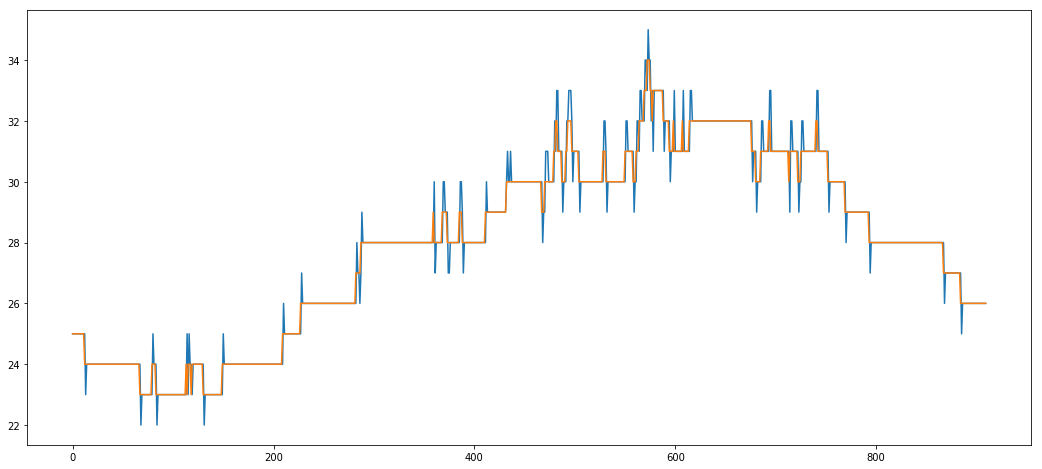

In [15]:
plt.figure(figsize=[18,8])
plt.plot(np.rint(pred1[:,0]))
plt.plot(entreno[:,0])

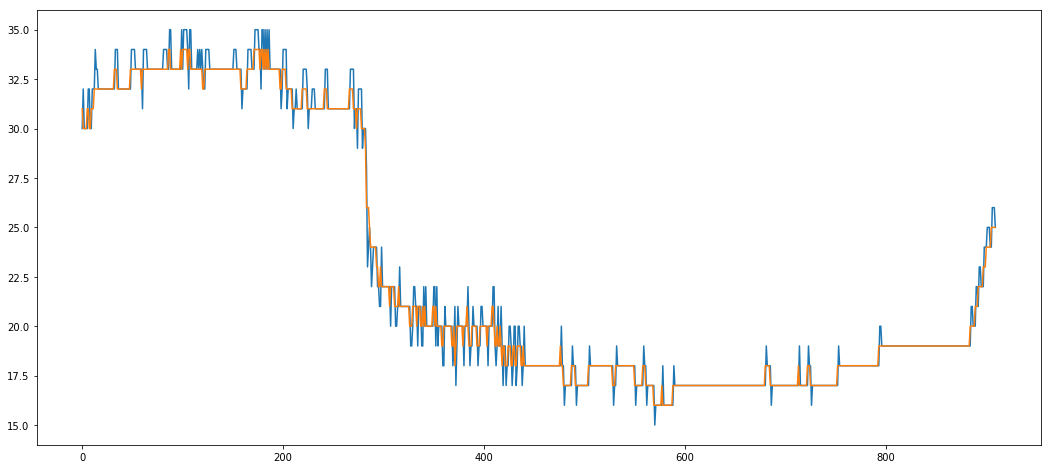

In [16]:
plt.figure(figsize=[18,8])
plt.plot(np.rint(pred1[:,1]))
plt.plot(entreno[:,1])

In [17]:
vamo=fit1.predict(probar)
vamo=scaler_y.inverse_transform(np.array(vamo).reshape((len(vamo),2)))
plt.figure(figsize=[18,8])
plt.plot(np.rint(vamo[:,0]))
plt.plot(probar[:,0])
plt.figure(figsize=[18,8])
plt.plot(np.rint(vamo[:,1]))
plt.plot(probar[:,0])

ValueError: Error when checking input: expected simple_rnn_1_input to have shape (1, 10) but got array with shape (1, 2)

In [ ]:
x_pacf = pacf(yt, nlags=30, method='ols')
plt.plot(x_pacf)
plt.plot(len(x_pacf)*[0],'--')
plt.title(' Partial autocorrelation function for Monthly Sunspots')

For our model we use 5 time lags of the data.

In [ ]:
yt_1=yt.shift(1)
yt_2=yt.shift(2)
yt_3=yt.shift(3)
yt_4=yt.shift(4)
yt_5=yt.shift(5)

In [ ]:
data = pd.concat([yt,yt_1,yt_2,yt_3,yt_4,yt_5],axis =1)
data.columns = ['yt', 'yt_1', 'yt_2', 'yt_3', 'yt_4', 'yt_5']
display(data.head(6))
display(data.tail(6))

In [ ]:
data = data.dropna()
y = data['yt']
cols = ['yt_1','yt_2','yt_3','yt_4','yt_5']
print(cols)
x = data[cols]
display(y.head())
display(y.tail())
display(x.head())
display(x.tail())

## Vamo a normalizar los datos

In [ ]:
from sklearn import preprocessing
# scaler para x
scaler = preprocessing.MinMaxScaler(feature_range=(-1, 1))

In [ ]:
# 5 columnas
x = np.array(x).reshape((len(x),5))
x = scaler.fit_transform(x)

In [ ]:
# scaler para y
scaler_y = preprocessing.MinMaxScaler(feature_range=(-1,1))
y = np.array(y).reshape((len(y),1))
y = scaler_y.fit_transform(y)

# Train and Test Sets

In [ ]:
train_end = int(len(y)*.8)
x_train = x[0:train_end,]
x_test = x[train_end+1:len(y),]
y_train = y[0:train_end]
y_test = y[train_end+1:len(y)]
x_train = x_train.reshape(x_train.shape+(1,))
x_test = x_test.reshape(x_test.shape+(1,))

print('Shape of x_train is ', x_train.shape)
print('Shape of x_test is ', x_test.shape)

In [ ]:
# importa el modelo secuencial, permite apilar capas de manera lineal
from keras.models import Sequential
# importa la capa densa, esta es una capa de red neuronal completamente conectada regular
# con una función lineal de activación
from keras.layers import Dense, Activation
# Optimizador de descenso de gradiente estocástico
from keras.layers.recurrent import LSTM
#import numpy as np

## Vamo a definir el modelo

In [ ]:
# define una semilla para tener resultados repetibles
seed = 2016
np.random.seed(seed)
# Define el modelo secuencial
fit1 = Sequential()
# Agrega una capa LSTM con cuatro neuronas, activación tanh, activación interoir hard_sgimoitde
# y forma de entrada (5,1)
fit1.add(LSTM(units=4,activation='tanh',
              recurrent_activation='hard_sigmoid',
              input_shape=(5,1)))
#Agrega una capa densa con una slida y activación lineal
fit1.add(Dense(units=1, activation='linear'))

In [ ]:
# define una semilla para tener resultados repetibles
seed = 2016
np.random.seed(seed)
# Define el modelo secuencial
fit2 = Sequential()
# Agrega una capa LSTM con cuatro neuronas, activación tanh, activación interoir hard_sgimoitde
# y forma de entrada (5,1)
fit2.add(LSTM(units=4,activation='tanh',
              recurrent_activation='hard_sigmoid',
              input_shape=(5,1)))
#Agrega una capa densa con una slida y activación lineal
fit2.add(Dense(units=1, activation='linear'))

In [ ]:
fit1.compile(loss='mean_squared_error', optimizer='rmsprop')
#Ajustar el modelo
history1 = fit1.fit(x_train, y_train, batch_size = 1, epochs=10, verbose=0, shuffle=False)

In [ ]:
fit2.compile(loss='mean_squared_error', optimizer='rmsprop')
#Ajustar el modelo
history2 = fit2.fit(x_train, y_train, batch_size = 1, epochs=10, verbose=0, shuffle=True)

In [ ]:
#seed =2016
#np.random.seed(seed)
fit3 = Sequential ()
# The batch_input_shape takes the batch size (1 in our example), number of attributes 
#(5 time lagged variables) and number of time steps (1 month forecast).
fit3.add(LSTM(units=4,stateful=True,batch_input_shape=(1,5,1),activation='tanh',
              recurrent_activation ='hard_sigmoid'))
fit3.add(Dense(units=1,activation='linear'))
fit3.compile(loss='mean_squared_error',optimizer='rmsprop')

In [ ]:
#seed =2016
#np.random.seed(seed)
fit4 = Sequential ()
# The batch_input_shape takes the batch size (1 in our example), number of attributes 
#(5 time lagged variables) and number of time steps (1 month forecast).
fit4.add(LSTM(units=4,stateful=True,batch_input_shape=(1,5,1),activation='tanh',
              recurrent_activation ='hard_sigmoid'))
fit4.add(Dense(units=1,activation='linear'))
fit4.compile(loss='mean_squared_error',optimizer='rmsprop')

In [ ]:
end_point =len(x_train)
start_point =end_point - 50

#The model has to be trained one epoch at a time with the
#state reset after each epoch

history3=[]
for i in range(len(x_train[start_point:end_point])):
    history3.append(fit3.fit(x_train[start_point:end_point],y_train[start_point:end_point],epochs=1,
             batch_size=1,verbose=0,shuffle=False))
    fit3.reset_states()
    
history4=[]
for i in range(len(x_train[start_point:end_point])):
    history4.append(fit4.fit(x_train[start_point:end_point],y_train[start_point:end_point],epochs=1,
             batch_size=1,verbose=0,shuffle=True))
    fit4.reset_states()

In [ ]:
from keras.layers.recurrent import GRU

fit5 = Sequential ()
#return_sequeinces=False para trabajar con una sola objetivo
#Para trabajar con varios objetivos se deja en True
fit5.add(GRU(units=4,return_sequences= False,activation='tanh',
             recurrent_activation='hard_sigmoid',input_shape=(5,1)))
fit5.add(Dense(units=1,activation='linear'))
fit5.compile(loss='mean_squared_error',optimizer='rmsprop')

In [ ]:
history5 = fit5.fit(x_train,y_train,batch_size=1,verbose=0,epochs=10)

the
model will forecast the next month based on the last 500 rolling
months of data:

The larger the batch size, the more memory you
will need to run the model

In [ ]:
display(fit1.summary())
display(fit2.summary())
display(fit3.summary())
display(fit4.summary())
display(fit5.summary())

# Evaluar el modelo
Train and Test MSE


In [ ]:
score_train1 = fit1.evaluate(x_train, y_train, batch_size=1)
score_test1 = fit1.evaluate(x_test, y_test, batch_size=1)

print('in train2 MSE = ', round(score_train1,4))
print('in test2 MSE = ', round( score_test1 ,4))

score_train2 = fit2.evaluate(x_train, y_train, batch_size=1)
score_test2 = fit2.evaluate(x_test, y_test, batch_size=1)

print('in train2 MSE = ', round(score_train2,4))
print('in test2 MSE = ', round( score_test2 ,4))

score_train3 = fit3.evaluate(x_train, y_train, batch_size=1)
score_test3 = fit3.evaluate(x_test, y_test, batch_size=1)

print('in train3 MSE = ', round(score_train3,4))
print('in test3 MSE = ', round( score_test3,4))

score_train4 = fit4.evaluate(x_train, y_train, batch_size=1)
score_test4 = fit4.evaluate(x_test, y_test, batch_size=1)

print('in train4 MSE = ', round(score_train4,4))
print('in test4 MSE = ', round( score_test4,4))

score_train5 = fit5.evaluate(x_train, y_train, batch_size=1)
score_test5 = fit5.evaluate(x_test, y_test, batch_size=1)

print('in train5 MSE = ', round(score_train5,4))
print('in test5 MSE = ', round( score_test5,4))

And to convert the predictions back to their original scale,
so we can view them individually:

In [ ]:
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

entreno = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test),1)))
plt.figure(figsize=[16,8])
plt.plot(np.rint(entreno),label='set de prueba',linewidth=2)

pred1 = fit1.predict(x_test)
pred1 = scaler_y.inverse_transform(np.array(pred1).reshape((len(pred1),1)))

# Difrerenca entre rms y rmse
# Se calcula el error rms

p1 = math.sqrt(mean_squared_error(pred1, entreno))
#RSME idntefica los grandes errores
#RSM identifica la variación de disftribución de frecuencias
#https://translate.googleusercontent.com/translate_c?depth=1&hl=es&prev=search&rurl=translate.google.com&sl=en&sp=nmt4&u=https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d&xid=17259,15700023,15700186,15700191,15700248&usg=ALkJrhipwo7TP2PruqpEsfcKMCIVIjSq4Q

plt.plot(np.rint(pred1),label='predicción sin shuffle (%.2f)'%p1)

pred2 = fit2.predict(x_test)
pred2 = scaler_y.inverse_transform(np.array(pred2).reshape((len(pred2),1)))

p2 = math.sqrt(mean_squared_error(pred2, entreno))

plt.plot(np.rint(pred2),label='predicción con suffle (%.2f)'%p2)

pred3 = fit3.predict(x_test,batch_size=1)
pred3 = scaler_y.inverse_transform(np.array(pred3).reshape((len(pred3),1)))

p3 = math.sqrt(mean_squared_error(pred3, entreno))

plt.plot(np.rint(pred3),label='predicción con estado sin suffle (%.2f)'%p3)

pred4 = fit4.predict(x_test,batch_size=1)
pred4 = scaler_y.inverse_transform(np.array(pred4).reshape((len(pred4),1)))

p4 = math.sqrt(mean_squared_error(pred4, entreno))

plt.plot(np.rint(pred4),label='predicción con estado con suffle (%.2f)'%p4)

pred5 = fit5.predict(x_test,batch_size=1)
pred5 = scaler_y.inverse_transform(np.array(pred5).reshape((len(pred5),1)))

p5 = math.sqrt(mean_squared_error(pred5, entreno))

plt.plot(np.rint(pred5),label='predicción con GRU (%.2f)'%p5)

plt.legend()


plt.figure()
plt.scatter(np.rint(pred1),np.rint(entreno),alpha=.1,label='predicción sin suffle')
plt.legend()
plt.figure()
plt.scatter(np.rint(pred2),np.rint(entreno),alpha=.1,label='predicción con suffle')
plt.legend()
plt.figure()
plt.scatter(np.rint(pred3),np.rint(entreno),alpha=.1,label='predicción con estado sin suffle')
plt.legend()
plt.figure()
plt.scatter(np.rint(pred4),np.rint(entreno),alpha=.1,label='predicción con estado con suffle')
plt.legend()
plt.figure()
plt.scatter(np.rint(pred5),np.rint(entreno),alpha=.1,label='predicción con GRU')
plt.legend()

In [ ]:
plt.plot(history1.history['loss'], 'r', label='pérdidas sin shuffle')
plt.plot(history2.history['loss'], 'b', label='pérdidas con shuffle')
plt.plot(history5.history['loss'], 'g', label='pérdidas con GRU')
plt.legend()

plt.figure()
h3 = [x.history['loss'] for x in history3]
plt.plot(h3, 'r', label='pérdidas con estado sin shuffle')
plt.legend()

plt.figure()
h4 = [x.history['loss'] for x in history4]
plt.plot(h4, 'b', label='pérdidas con estado con shuffle')
plt.legend()

In [ ]:
# predicciones del entrenamiento de cambio para plotear
#trainPredictPlot = numpy.empty_like(data)



y = scaler_y.inverse_transform(np.array(y))#.reshape((y,1)))
y_train = scaler_y.inverse_transform(np.array(y_train))


plt.figure(figsize=[16,8])
xplot =x
ventana = 5
trainPredictPlot = np.empty_like(y_train)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[0:len(y_train), :] = y_train
plt.plot(trainPredictPlot)

vPredictPlot = np.empty_like(y)
vPredictPlot[:, :] = np.nan
vPredictPlot[len(y_train)+1:len(y), :] = np.rint(pred2)
plt.plot(vPredictPlot)

train_end = int(len(y)*.8)  
x_train = x[0:train_end,]  
x_test = x[train_end+1:len(y),]  
y_train = y[0:train_end]  
y_test = y[train_end+1:len(y)]  
x_train = x_train.reshape(x_train.shape+(1,))  
x_test = x_test.reshape(x_test.shape+(1,))  